# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [5]:
df = pd.read_csv("../../data/Loan_Default.csv")

In [ ]:
data = df.copy()
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in cat_cols:
    unique_values = data[col].dropna().unique()
    unique_values_na = data[col].unique()
    value_mapping = {value: num for num, value in enumerate(unique_values)}
    data[col] = data[col].map(value_mapping)
    print(f"values for col {col} converted from {unique_values_na} to {data[col].unique()}")

values for col loan_limit converted from ['cf' nan 'ncf'] to [ 0. nan  1.]
values for col Gender converted from ['Sex Not Available' 'Male' 'Joint' 'Female'] to [0 1 2 3]
values for col approv_in_adv converted from ['nopre' 'pre' nan] to [ 0.  1. nan]
values for col loan_type converted from ['type1' 'type2' 'type3'] to [0 1 2]
values for col loan_purpose converted from ['p1' 'p4' 'p3' 'p2' nan] to [ 0.  1.  2.  3. nan]
values for col Credit_Worthiness converted from ['l1' 'l2'] to [0 1]
values for col open_credit converted from ['nopc' 'opc'] to [0 1]
values for col business_or_commercial converted from ['nob/c' 'b/c'] to [0 1]
values for col Neg_ammortization converted from ['not_neg' 'neg_amm' nan] to [ 0.  1. nan]
values for col interest_only converted from ['not_int' 'int_only'] to [0 1]
values for col lump_sum_payment converted from ['not_lpsm' 'lpsm'] to [0 1]
values for col construction_type converted from ['sb' 'mh'] to [0 1]
values for col occupancy_type converted from ['pr' '

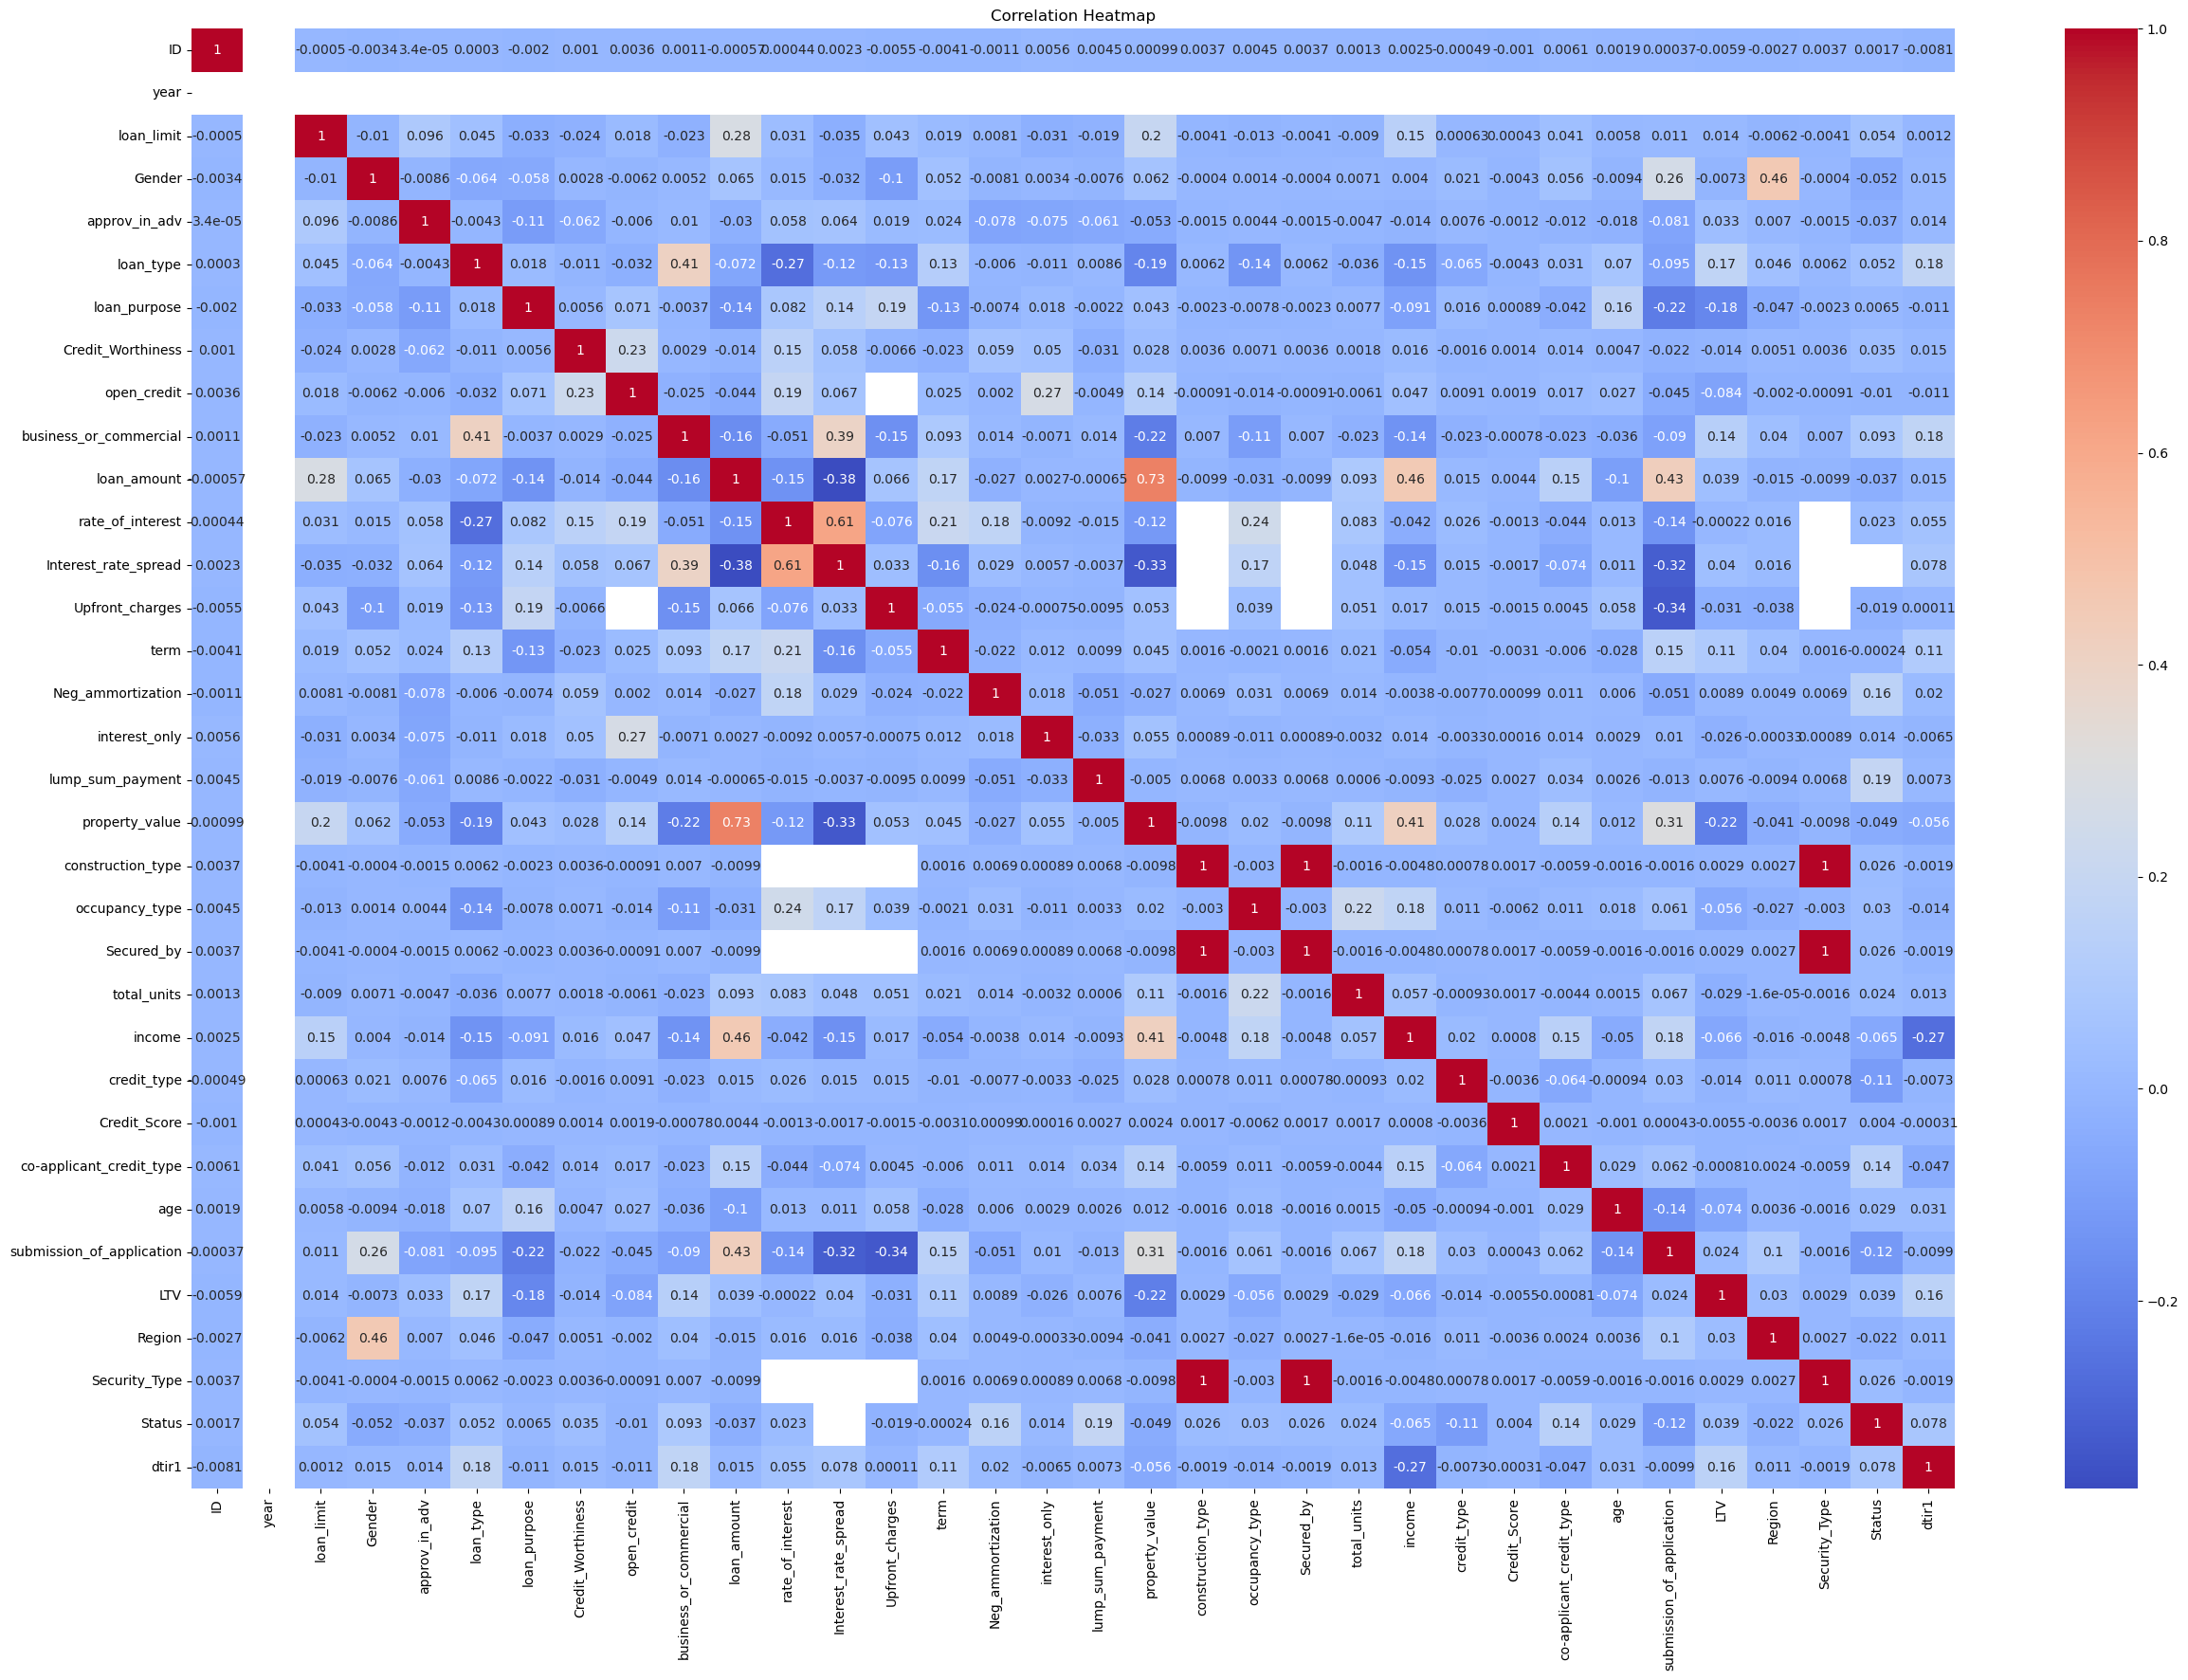

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Creditworthiness vs Loan Amount and Approval Status

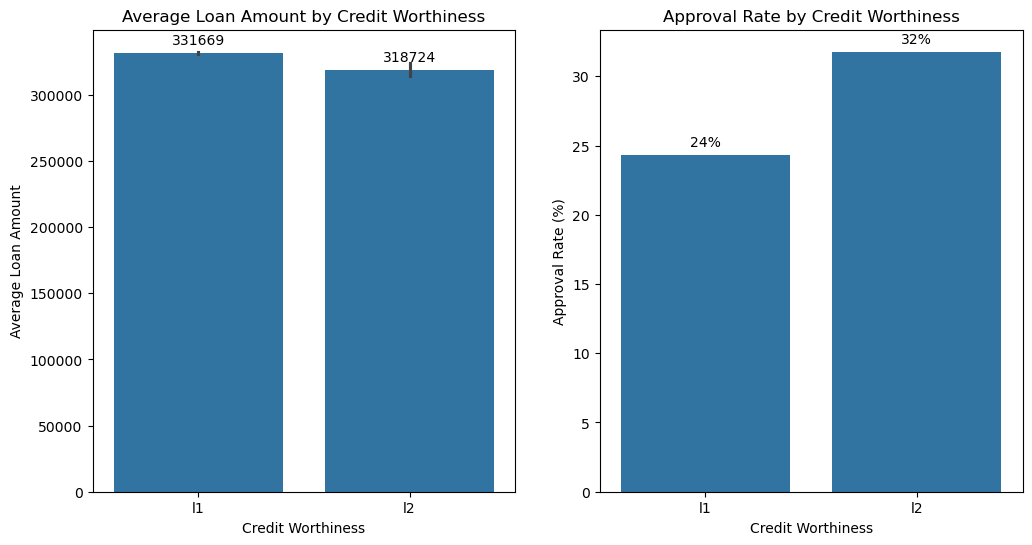

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(data=df, x='Credit_Worthiness', y='loan_amount', estimator='mean')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Average Loan Amount by Credit Worthiness')
plt.ylabel('Average Loan Amount')
plt.xlabel('Credit Worthiness')

plt.subplot(1, 2, 2)
approval_data = df.groupby('Credit_Worthiness')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100 
ax = sns.barplot(data=approval_data, x='Credit_Worthiness', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by Credit Worthiness')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Credit Worthiness')

plt.show()

### Type of credit worthiness doesnt have big imacto on credit loan, but l2 type have 8% more approval rate

# Loan type vs Loan Amount and Approval Status

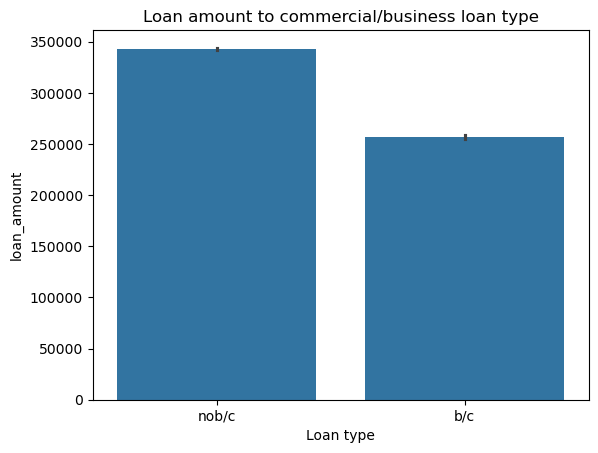

In [14]:
sns.barplot(data=df, x='business_or_commercial', y='loan_amount', estimator='mean')
plt.title('Loan amount to commercial/business loan type')
plt.xlabel('Loan type')
plt.ylabel('loan_amount')
plt.show()

### Mean amount of loan is higher for no buisness

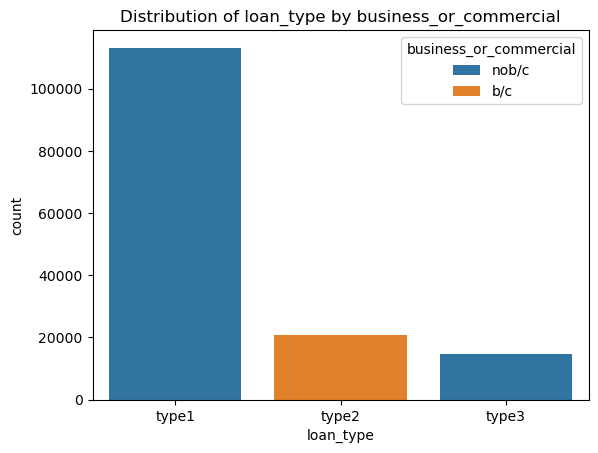

In [ ]:
sns.countplot(data=df, x='loan_type', hue='business_or_commercial')
plt.title('Distribution of loan_type by business_or_commercial')
plt.show()

### Type2 of loan is only used for buisness loans

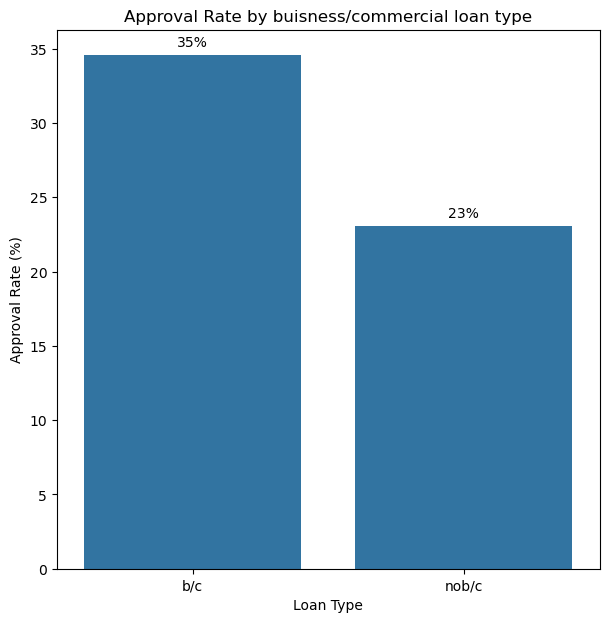

In [15]:
plt.figure(figsize=(7, 7))
approval_data = df.groupby('business_or_commercial')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100
ax = sns.barplot(data=approval_data, x='business_or_commercial', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by buisness/commercial loan type')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Loan Type')

plt.show()

### The business loan type with a significantly higher approval rate.

# Loan Purpose and Approval Status

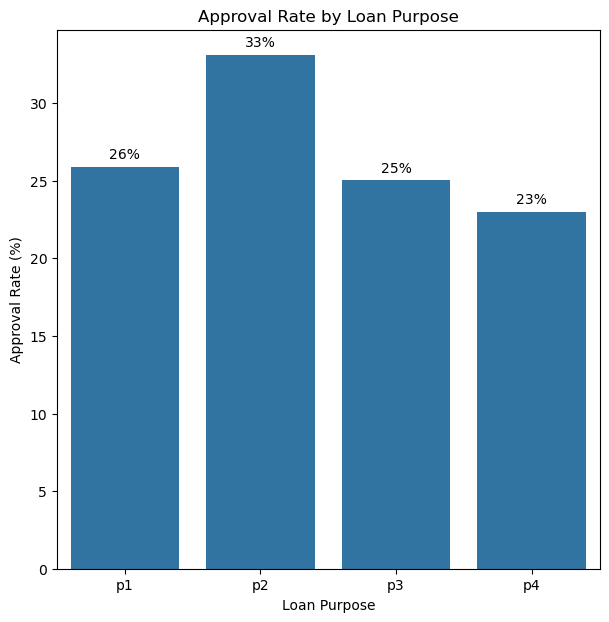

In [ ]:
plt.figure(figsize=(7, 7))
approval_data = df.groupby('loan_purpose')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100
ax = sns.barplot(data=approval_data, x='loan_purpose', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by Loan Purpose')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Loan Purpose')

plt.show()

### p2 loan purpose has highest approval rate